In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
def build_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ] )

    return model


In [ ]:
def train_model(optimizer, optimizer_name, epochs=20):
    print(f"\nTraining with {optimizer_name} optimizer")

    model = build_cnn_model()

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=2
    )

    return history

In [ ]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
history_sgd = train_model(sgd_optimizer, "SGD with Momentum")

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
history_adam = train_model(adam_optimizer, "Adam")


Training with SGD with Momentum optimizer


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 - 62s - 80ms/step - accuracy: 0.3862 - loss: 1.6963 - val_accuracy: 0.4933 - val_loss: 1.4217
Epoch 2/20
782/782 - 57s - 72ms/step - accuracy: 0.5496 - loss: 1.2710 - val_accuracy: 0.5955 - val_loss: 1.1451
Epoch 3/20
782/782 - 61s - 78ms/step - accuracy: 0.6223 - loss: 1.0746 - val_accuracy: 0.5903 - val_loss: 1.1633
Epoch 4/20
782/782 - 78s - 100ms/step - accuracy: 0.6670 - loss: 0.9592 - val_accuracy: 0.6497 - val_loss: 1.0062
Epoch 5/20
782/782 - 59s - 75ms/step - accuracy: 0.6969 - loss: 0.8667 - val_accuracy: 0.6607 - val_loss: 0.9808
Epoch 6/20
782/782 - 83s - 106ms/step - accuracy: 0.7238 - loss: 0.7911 - val_accuracy: 0.6742 - val_loss: 0.9627
Epoch 7/20
782/782 - 79s - 101ms/step - accuracy: 0.7476 - loss: 0.7255 - val_accuracy: 0.6872 - val_loss: 0.9310
Epoch 8/20
782/782 - 59s - 75ms/step - accuracy: 0.7694 - loss: 0.6641 - val_accuracy: 0.6695 - val_loss: 1.0225
Epoch 9/20
782/782 - 57s - 73ms/step - accuracy: 0.7881 - loss: 0.6025 - val_accuracy: 0.6645

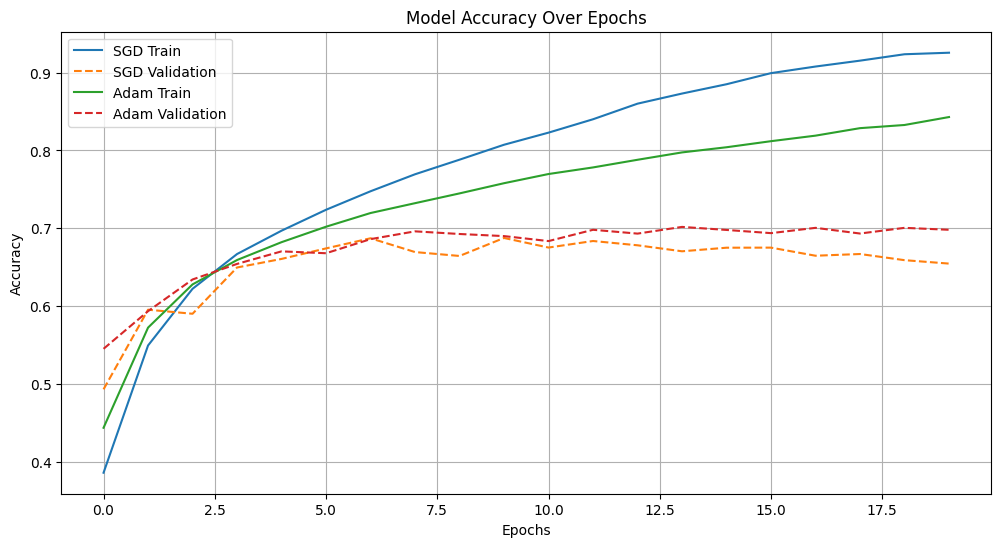

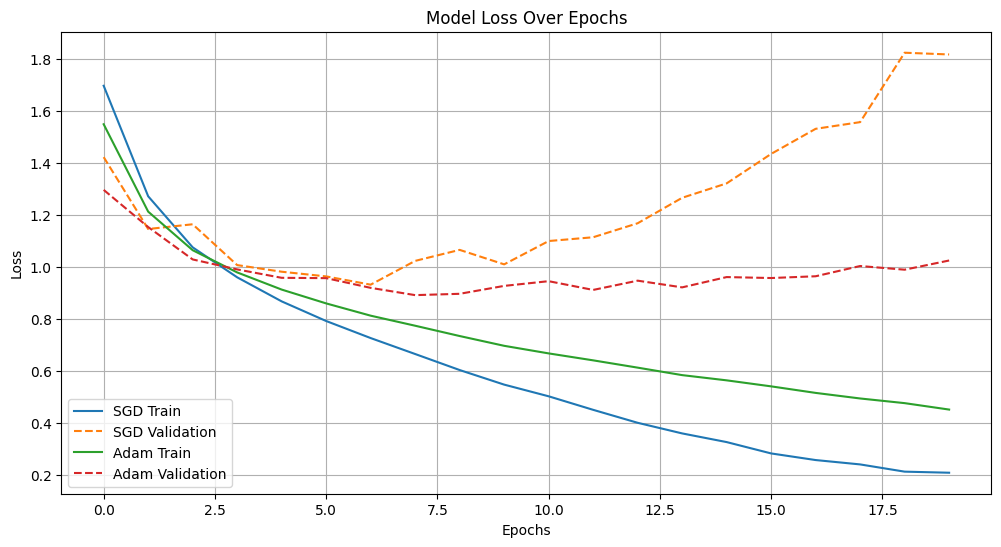

In [ ]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12, 6))

    for name, history in histories.items():
        plt.plot(history.history[key], label=f'{name} Train')
        plt.plot(history.history['val_' + key], linestyle='--', label=f'{name} Validation')

    plt.xlabel('Epochs')
    plt.ylabel(key.capitalize())
    plt.title(f'Model {key.capitalize()} Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Compare accuracy
plot_history({
    'SGD': history_sgd,
    'Adam': history_adam
}, key='accuracy')

# Compare loss
plot_history({
    'SGD': history_sgd,
    'Adam': history_adam
}, key='loss')